This document is used to analyze the data from the *stability test* of the Bruker SkyScan 1272 machine.
We've been running the stability test on Aug 29 2016, the data is saved in the text file "StabilityTest_15G09089-B.txt" which we load and display with [NumPy](http://www.numpy.org/) and [matplotlib](http://matplotlib.org/), styled with [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/).

After importing the necessary [packages](https://pypi.python.org/pypi), we set up some notebook defaults.

In [1]:
# Import the necessary packages
import numpy
import matplotlib.pylab as plt
import datetime
from matplotlib.dates import MinuteLocator, DateFormatter
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    # Make the notebook UTF-8-aware if we're not running Python3
    reload(sys)
    sys.setdefaultencoding("utf-8") # http://stackoverflow.com/a/19089210/323100

In [9]:
# Setup notebook defaults
%matplotlib inline
# Display all images the same way
plt.rc('image', cmap='gray', interpolation='nearest')
# Size up figures a bit
plt.rcParams['figure.figsize'] = (16, 9)

To be able to efficiently load the data in the log file, we first need to *massage* the data.
We do this by defining so-called [lambda functions](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which convert the input to something usable.
Afterwards we actually load the data and format the time axis to give us something nice in the output plots.

In [3]:
# Prepare variables for loading the stability test file
names = ("id", "time", "intensity", "temp")
converttime = lambda x: datetime.datetime.strptime(x.decode("utf-8"),
                                                   '%Hh:%Mm:%Ss')
convertpercent = lambda x: float(x.decode("utf-8").strip("%"))
convertcelsius = lambda x: float(x.decode("utf-8").strip("C"))

In [4]:
#Load data and format colums
data = numpy.genfromtxt('StabilityTest_15G09089-B.txt',delimiter="\t",
                        skip_header=12, skip_footer=1,
                        dtype=[('id', 'int'),
                               ('time', 'object'),
                               ('intensity', 'float'),
                               ('temperature', 'float')],
                        names=names, converters={1:converttime,
                                                 2: convertpercent,
                                                 3: convertcelsius})
# Format the time column for plotting
minutes = MinuteLocator(byminute=range(0,60,5))
minuteFmt = DateFormatter("%H:%M")

Now that we loaded the data, we can use the intensity and temperature values to calculate both their means.
Since both values rise and drop significantly at the beginnig, we discard some values at the beginning.

In [10]:
# Calculate the mean intensity and temperature (after a certain time step)
# We use these mean values to adjust the range of the plots below
after = 100
print('Step %s corresponds to discarding the first %s minutes and '
      '%s seconds.' % (after, data['time'][after].minute, data['time'][after].second))
mi = round(numpy.mean(data['intensity'][after:]),1)
mt = round(numpy.mean(data['temp'][after:]),1)
print('The mean intensity (after %s steps) is %s%%.' % (after, mi))
print('The mean temperature (after %s steps) is %s°C.' % (after, mt))

Step 100 corresponds to discarding the first 11 minutes and 30 seconds.
The mean intensity (after 100 steps) is 46.7%.
The mean temperature (after 100 steps) is 19.7°C.


Now we plot the values, first all in the same plot, then zoomed in on the y axis.
Since we plot again, we have to get the color values from the current Seaborn palette and specify the color of each plot.

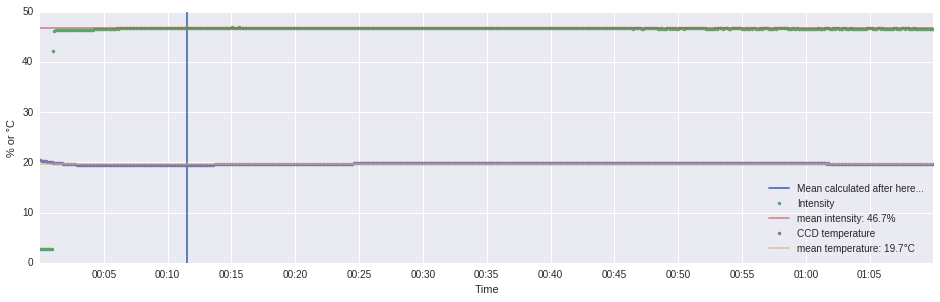

In [6]:
# Overview plot
range = 1.0
linealpha = 0.618
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Mean calculated after here...')
ax.plot(data['time'], data['intensity'], label='Intensity',
        marker='.', ls='', c=sns.color_palette()[1])
ax.axhline(mi, alpha=linealpha, label='mean intensity: %s%%' % mi,
           c=sns.color_palette()[2])
ax.plot(data['time'], data['temp'], label='CCD temperature',
        marker='.', ls='', c=sns.color_palette()[3])
ax.axhline(mt, alpha=linealpha, label='mean temperature: %s°C' % mt,
           c=sns.color_palette()[4])
plt.legend(loc='lower right')
plt.ylabel('% or °C')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.show()

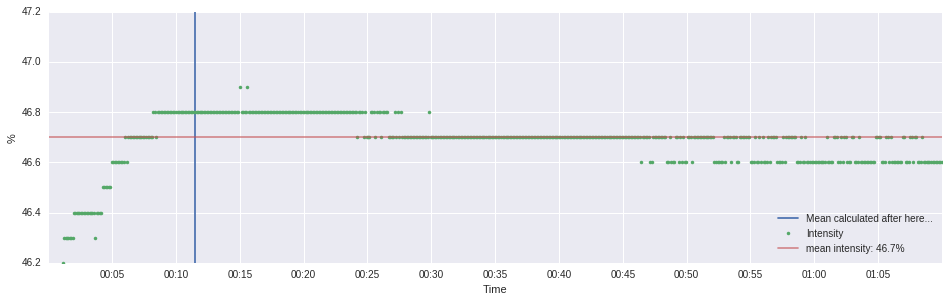

In [7]:
# Detailed intensity
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Mean calculated after here...')
ax.plot(data['time'], data['intensity'], label='Intensity',
        marker='.', ls='', c=sns.color_palette()[1])
ax.axhline(mi, alpha=linealpha, label='mean intensity: %s%%' % mi,
           c=sns.color_palette()[2])
plt.legend(loc='lower right')
plt.ylabel('%')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.ylim([mi - range / 2, mi + range / 2])
plt.show()

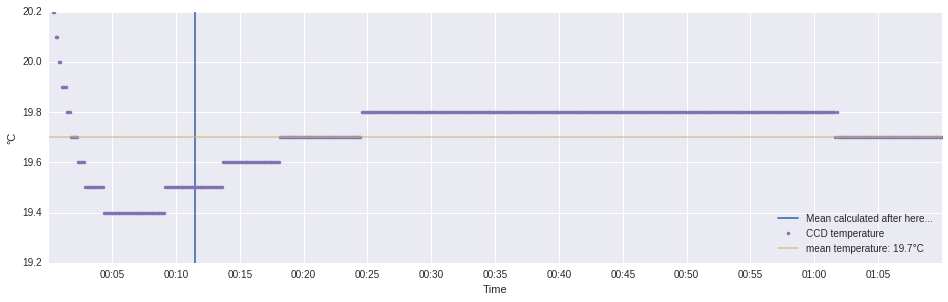

In [8]:
# Detailed CCD temperature
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Mean calculated after here...')
ax.plot(data['time'], data['temp'], label='CCD temperature',
        marker='.', ls='', c=sns.color_palette()[3])
ax.axhline(mt, alpha=linealpha, label='mean temperature: %s°C' % mt,
           c=sns.color_palette()[4])
plt.legend(loc='lower right')
plt.ylabel('°C')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.ylim([mt - range / 2, mt + range / 2])
plt.show()